# Melbourne city council Pedestrian Footfall dataset Analysis

Dataset: https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-2009-to-Present-counts-/b2ak-trbp

Note: you will need the Jupyer Lab plotly extension installed: https://plotly.com/python/getting-started

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

from utils import load_and_clean_pedestrian_data

from pathlib import Path

data_path = Path("../data/Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv")

In [2]:
df = load_and_clean_pedestrian_data(data_path)
df.head()

ID               Date_Time  Year     Month  Mdate     Day  Time  \
0  2887628  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
1  2887629  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
2  2887630  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
3  2887631  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
4  2887632  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   

   Sensor_ID                   Sensor_Name  Hourly_Counts            datetime  
0         34          Flinders St-Spark La            300 2019-11-01 17:00:00  
1         39                  Alfred Place            604 2019-11-01 17:00:00  
2         37               Lygon St (East)            216 2019-11-01 17:00:00  
3         40  Lonsdale St-Spring St (West)            627 2019-11-01 17:00:00  
4         36               Queen St (West)            774 2019-11-01 17:00:00

In [3]:
YEARS = sorted(df["Year"].unique())
SENSORS = df["Sensor_Name"].unique()
print(len(SENSORS))

69


In [9]:
SENSORS

array(['Flinders St-Spark La', 'Alfred Place', 'Lygon St (East)',
       'Lonsdale St-Spring St (West)', 'Queen St (West)',
       'St Kilda Rd-Alexandra Gardens', 'Grattan St-Swanston St (West)',
       'Monash Rd-Swanston St (West)', 'Tin Alley-Swanston St (West)',
       'Southbank', 'Little Collins St-Swanston St (East)',
       'Pelham St (S)', 'Melbourne Central-Elizabeth St (East)',
       'QVM-Queen St (East)', 'QVM-Therry St (South)',
       'Faraday St-Lygon St (West)', 'QVM-Franklin St (North)',
       'Elizabeth St-Lonsdale St (South)', 'Lincoln-Swanston(West)',
       'Elizabeth St-La Trobe St (East)',
       'Lonsdale St - Elizabeth St (North)', 'Bourke St Bridge',
       'Bourke St - Spencer St (North)', 'Swanston St - RMIT Building 80',
       'Swanston St - RMIT Building 14', 'La Trobe St (North)',
       'Town Hall (West)', 'Collins Place (South)',
       'Collins Place (North)', 'Collins St (North)',
       'Bourke Street Mall (South)', 'Bourke Street Mall (North)',


In [11]:
sensors_subset = [
    'Flinders St-Spark La', 'Alfred Place', 'Lygon St (East)',
    'Lonsdale St-Spring St (West)', 'Queen St (West)',
    'St Kilda Rd-Alexandra Gardens', 'Grattan St-Swanston St (West)',
    'Monash Rd-Swanston St (West)', 'Tin Alley-Swanston St (West)',
    'Southbank', 'Little Collins St-Swanston St (East)'
]

In [73]:
def lines(df, sensors=None, year=None, month=None, **kwargs):
    if year is not None:
        df = df[df["Year"] == year]
    if month is not None:
        df = df[df["Month"] == month]        
    if sensors is not None:
        df = df[df["Sensor_Name"].isin(sensors)]
    fig = px.line(df, y="Hourly_Counts", x="datetime", facet_row="Sensor_Name", **kwargs)
    fig.update_yaxes(matches=None, showgrid=False, zeroline=False, title_text=None)
    fig.update_xaxes(showgrid=False)
    fig.for_each_annotation(lambda a: a.update(textangle=0, text=a.text.split('=')[-1]))
    return fig

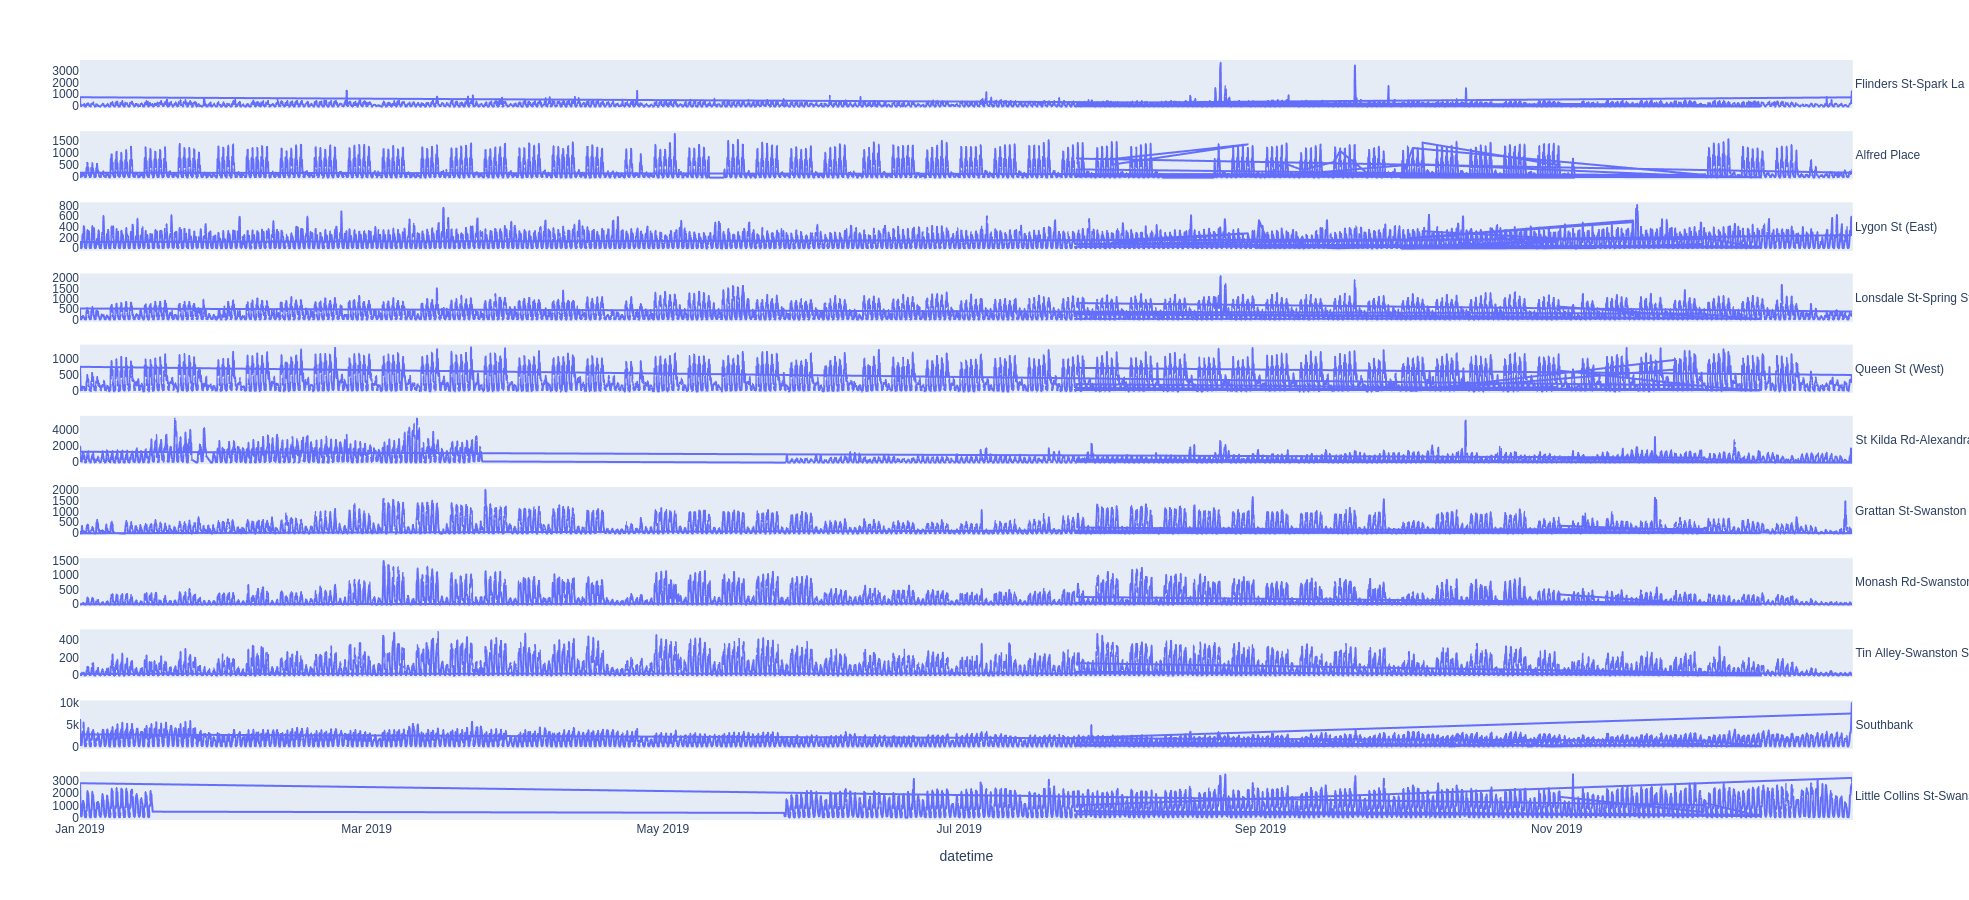

In [75]:
lines(df, sensors=sensors_subset, year=2019, month=None, height=900)